### Analysis using SARIMAX model for Time Series

In [11]:
import itertools
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
# Ignoring warnings
warnings.filterwarnings("ignore")

# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

In [13]:
# Reads the monthly variables
df_monthly = pd.read_csv("./datasets/proc/monthly_variables.csv.zip", index_col=0, parse_dates=["date"])

# Scales the values to be between 0 and 1
df_monthly[df_monthly.set_index('date').columns] = MinMaxScaler().fit_transform(df_monthly[df_monthly.set_index('date').columns])

# Removes noise via moving average
df_monthly[df_monthly.set_index('date').columns] = df_monthly.iloc[:, 1:].ewm(span=40).mean()

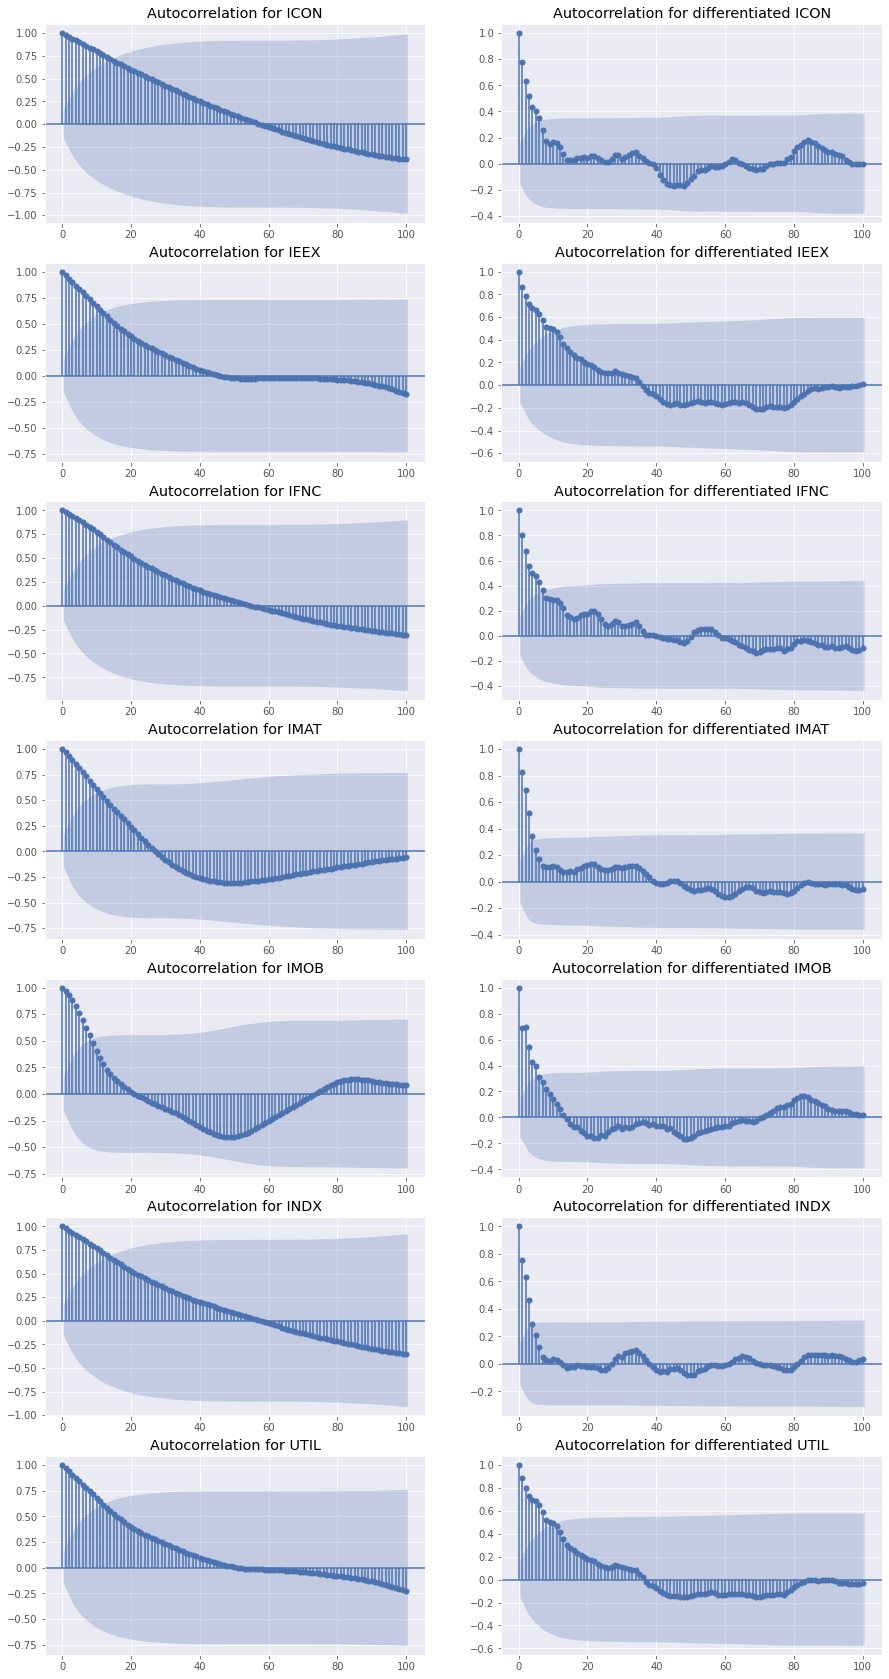

In [8]:
fig, axs = plt.subplots(7, 2, figsize=(15, 30))

for i, col in enumerate(["ICON", "IEEX", "IFNC", "IMAT", "IMOB", "INDX", "UTIL"]):
    data = df_monthly[col].values
    diff_data = df_monthly[col].diff().dropna()
    plot_acf(data, lags=100, ax=axs[i, 0], title=f"Autocorrelation for {col}")
    plot_acf(diff_data, lags=100, ax=axs[i, 1], title=f"Autocorrelation for differentiated {col}")

plt.show()

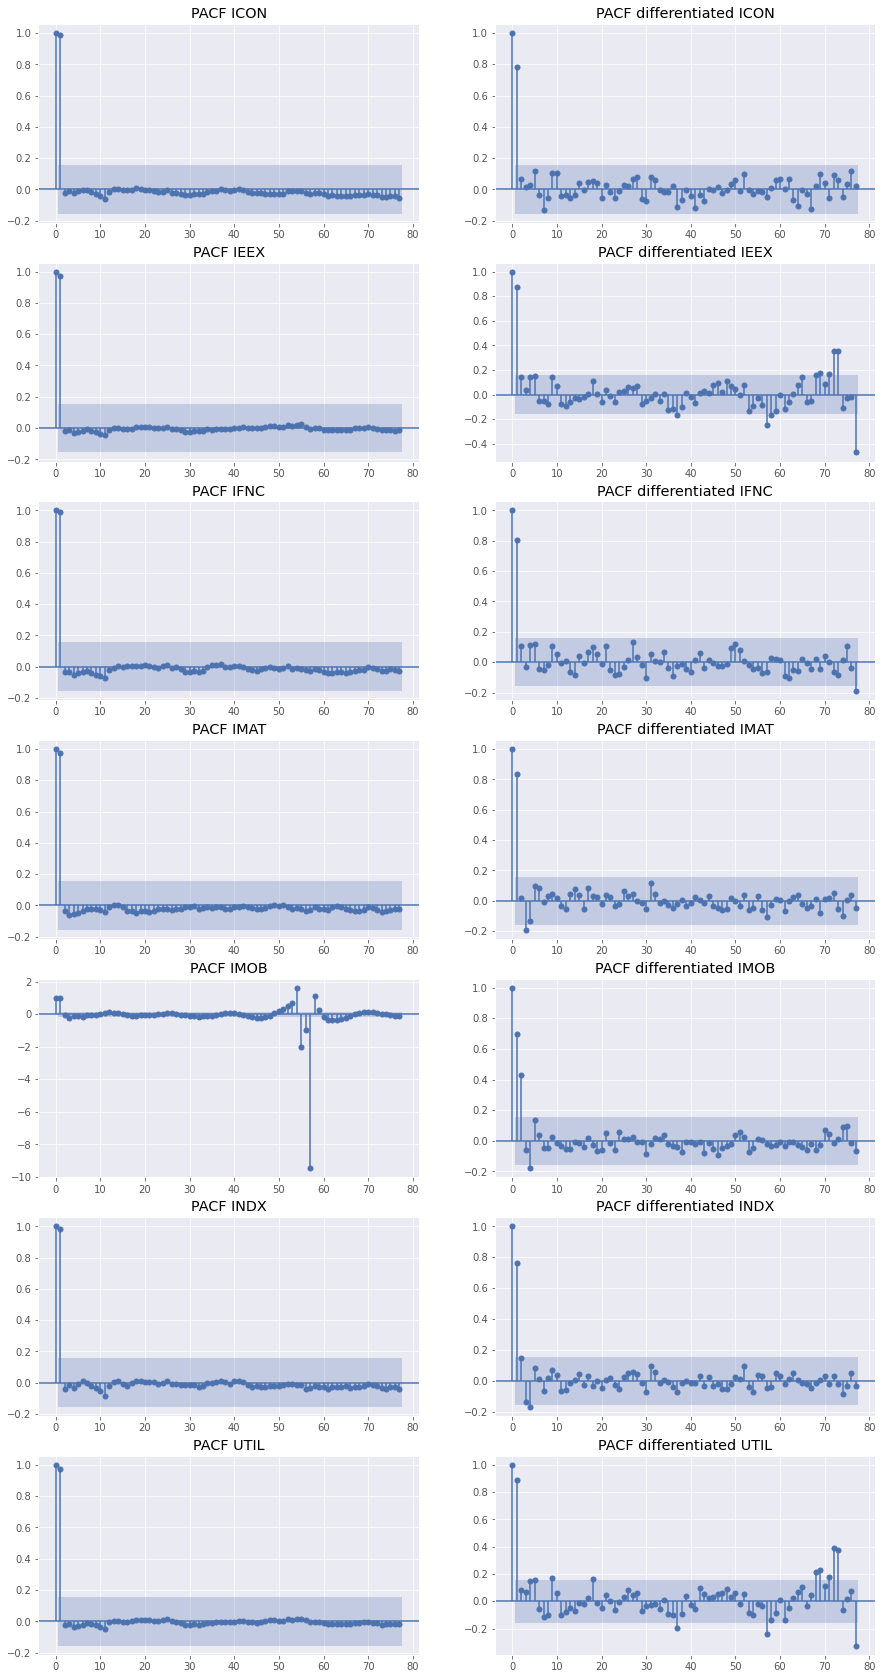

In [8]:
fig, axs = plt.subplots(7, 2, figsize=(15, 30))

for i, col in enumerate(["ICON", "IEEX", "IFNC", "IMAT", "IMOB", "INDX", "UTIL"]):
    data = df_monthly.set_index("date")[col].values
    diff_data = df_monthly.set_index("date")[col].diff().dropna()
    plot_pacf(data, lags=100, ax=axs[i, 0], title=f"Autocorrelation for {col}")
    plot_pacf(diff_data, lags=100, ax=axs[i, 1], title=f"Autocorrelation for differentiated {col}")

plt.show()

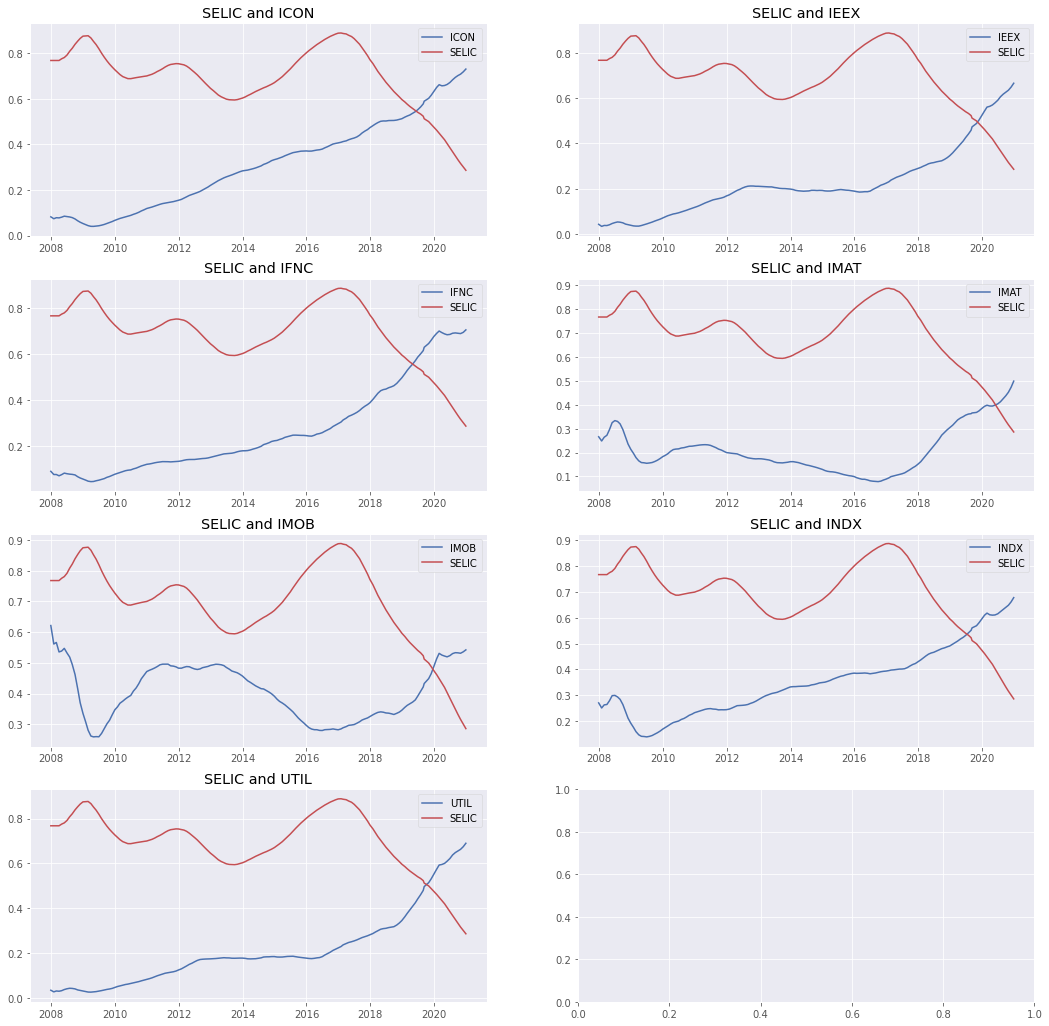

In [10]:
figure, axs = plt.subplots(4, 2, figsize=(18, 18))

for i, col in enumerate(["ICON", "IEEX", "IFNC", "IMAT", "IMOB", "INDX", "UTIL"]):
    ax = axs[i//2, i%2]
    ax.plot(df_monthly['date'], df_monthly[col], label=f"{col}")
    ax.plot(df_monthly['date'], df_monthly['SELIC'], label="SELIC")
    ax.set_title(f"SELIC and {col}")
    ax.legend()
    
plt.show()

## Performing Time Series Analysis

In [18]:
# Defines the ARIMAX params
ps = range(3)               # AR order
qs = range(3)               # MA order
ps_seasonality = range(3)   # Seasonal AR order
qs_seasonality = range(3)   # Seasonal MA order

# Obtains an array with all possible combinations of the params
params = itertools.product(ps, qs, ps_seasonality, qs_seasonality)

### ICON

In [19]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["ICON"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                ICON   No. Observations:                  157
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                 694.647
Date:                             Sun, 04 Apr 2021   AIC                          -1369.293
Time:                                     19:00:40   BIC                          -1339.735
Sample:                                          0   HQIC                         -1357.282
                                             - 157                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       1.578e-06   2.71e-06      0.582      0.560   -3.73e-06    6.89e-06
DOLLAR        -0.2402      

### IEEX

In [11]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["IEEX"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -1077.5412468044738
                                     SARIMAX Results                                      
Dep. Variable:                        D.DS12.IEEX   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 683.738
Date:                            Sun, 04 Apr 2021   AIC                          -1351.476
Time:                                    10:56:25   BIC                          -1327.774
Sample:                                         0   HQIC                         -1341.845
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       3.316e-06   2.66e-06      1.249      0.2

### IFNC

In [12]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["IFNC"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -1084.6518055914275
                                     SARIMAX Results                                      
Dep. Variable:                        D.DS12.IFNC   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 659.929
Date:                            Sun, 04 Apr 2021   AIC                          -1303.857
Time:                                    10:57:05   BIC                          -1280.154
Sample:                                         0   HQIC                         -1294.225
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       1.511e-06   2.28e-06      0.662      0.5

### IMAT

In [13]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["IMAT"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -1001.8880305960718
                                      SARIMAX Results                                      
Dep. Variable:                                IMAT   No. Observations:                  157
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                 611.847
Date:                             Sun, 04 Apr 2021   AIC                          -1201.695
Time:                                     10:59:29   BIC                          -1169.259
Sample:                                          0   HQIC                         -1188.514
                                             - 157                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        1.34e-06   6.29e-07      2.131 

### IMOB

In [14]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["IMOB"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -882.64497296976577
                                      SARIMAX Results                                      
Dep. Variable:                         D.DS12.IMOB   No. Observations:                  144
Model:             SARIMAX(1, 0, 2)x(0, 0, [], 12)   Log Likelihood                 553.956
Date:                             Sun, 04 Apr 2021   AIC                          -1087.912
Time:                                     11:00:25   BIC                          -1058.425
Sample:                                          0   HQIC                         -1075.929
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       1.257e-06   3.52e-06      0.357 

### INDX

In [15]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["INDX"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -585.89439127999457
                                     SARIMAX Results                                      
Dep. Variable:                        D.DS12.INDX   No. Observations:                  144
Model:             SARIMAX(2, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 632.958
Date:                            Sun, 04 Apr 2021   AIC                          -1247.916
Time:                                    11:01:13   BIC                          -1221.314
Sample:                                         0   HQIC                         -1237.106
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       5.257e-06   3.31e-06      1.587      0.1

### UTIL

In [16]:
best_model = None 

for p, q, p_seasonality, q_seasonality in params:
    model = sm.tsa.statespace.SARIMAX(
        df_monthly["UTIL"], 
        df_monthly[["DOLLAR", "GDP", "IPCA", "SELIC", "VIX"]], 
        order=(p, 1, q), 
        seasonal_order=(p_seasonality, 1, q_seasonality, 12), 
        trend='t', 
        enforce_inversibility=False, 
        enforce_stationarity=False
    )
    model = model.fit()
    if not best_model:
        best_model = model
    best_model = model if best_model.aic > model.aic else best_model

print(best_model.summary())

For parameters (2,1,2)x(2,1,2,12) -> AIC: -1053.8621755332722
                                     SARIMAX Results                                      
Dep. Variable:                        D.DS12.UTIL   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 674.034
Date:                            Sun, 04 Apr 2021   AIC                          -1332.069
Time:                                    11:02:09   BIC                          -1308.366
Sample:                                         0   HQIC                         -1322.437
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       2.581e-06    2.8e-06      0.922      0.3